In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**INTRODUCTION**
This database encodes the complete set of possible board configurations at the end of tic-tac-toe games, where "x" is assumed to have played first. The target concept is "win for x" (i.e., true when "x" has one of 8 possible ways to create a "three-in-a-row").

Features of dataset:-

V1 = top-left-square: {x,o,b}

V2 = top-middle-square: {x,o,b}

V3 = top-right-square: {x,o,b}

V4 = middle-left-square: {x,o,b}

V5 = middle-middle-square: {x,o,b}

V6 = middle-right-square: {x,o,b}

V7 = bottom-left-square: {x,o,b}

V8 = bottom-middle-square: {x,o,b}

V = bottom-right-square: {x,o,b}

V10 = Class: {positive,negative}

In [4]:
df=pd.read_csv('/content/tic-tac-toe-endgame.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


**DATA COMPREHEND**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   V1      958 non-null    object
 1   V2      958 non-null    object
 2   V3      958 non-null    object
 3   V4      958 non-null    object
 4   V5      958 non-null    object
 5   V6      958 non-null    object
 6   V7      958 non-null    object
 7   V8      958 non-null    object
 8   V9      958 non-null    object
 9   V10     958 non-null    object
dtypes: object(10)
memory usage: 75.0+ KB


In [6]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
count,958,958,958,958,958,958,958,958,958,958
unique,3,3,3,3,3,3,3,3,3,2
top,x,x,x,x,x,x,x,x,x,positive
freq,418,378,418,378,458,378,418,378,418,626


In [7]:
for i in df:
  print(df[i].unique())

['x' 'o' 'b']
['x' 'o' 'b']
['x' 'o' 'b']
['x' 'o' 'b']
['o' 'b' 'x']
['o' 'b' 'x']
['x' 'o' 'b']
['o' 'x' 'b']
['o' 'x' 'b']
['positive' 'negative']


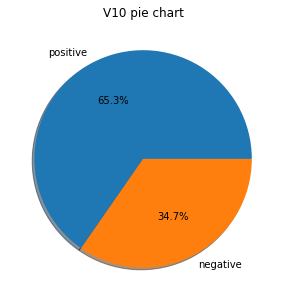

In [8]:
plt.figure(figsize=(10,5))
labels=df.V10.unique()
count=df.V10.value_counts()
plt.pie(count,labels=labels,autopct='%1.1f%%',shadow=True)
plt.title('V10 pie chart')
plt.show()

In this dataset 65.3% is a  positive result and rest is a negative result


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

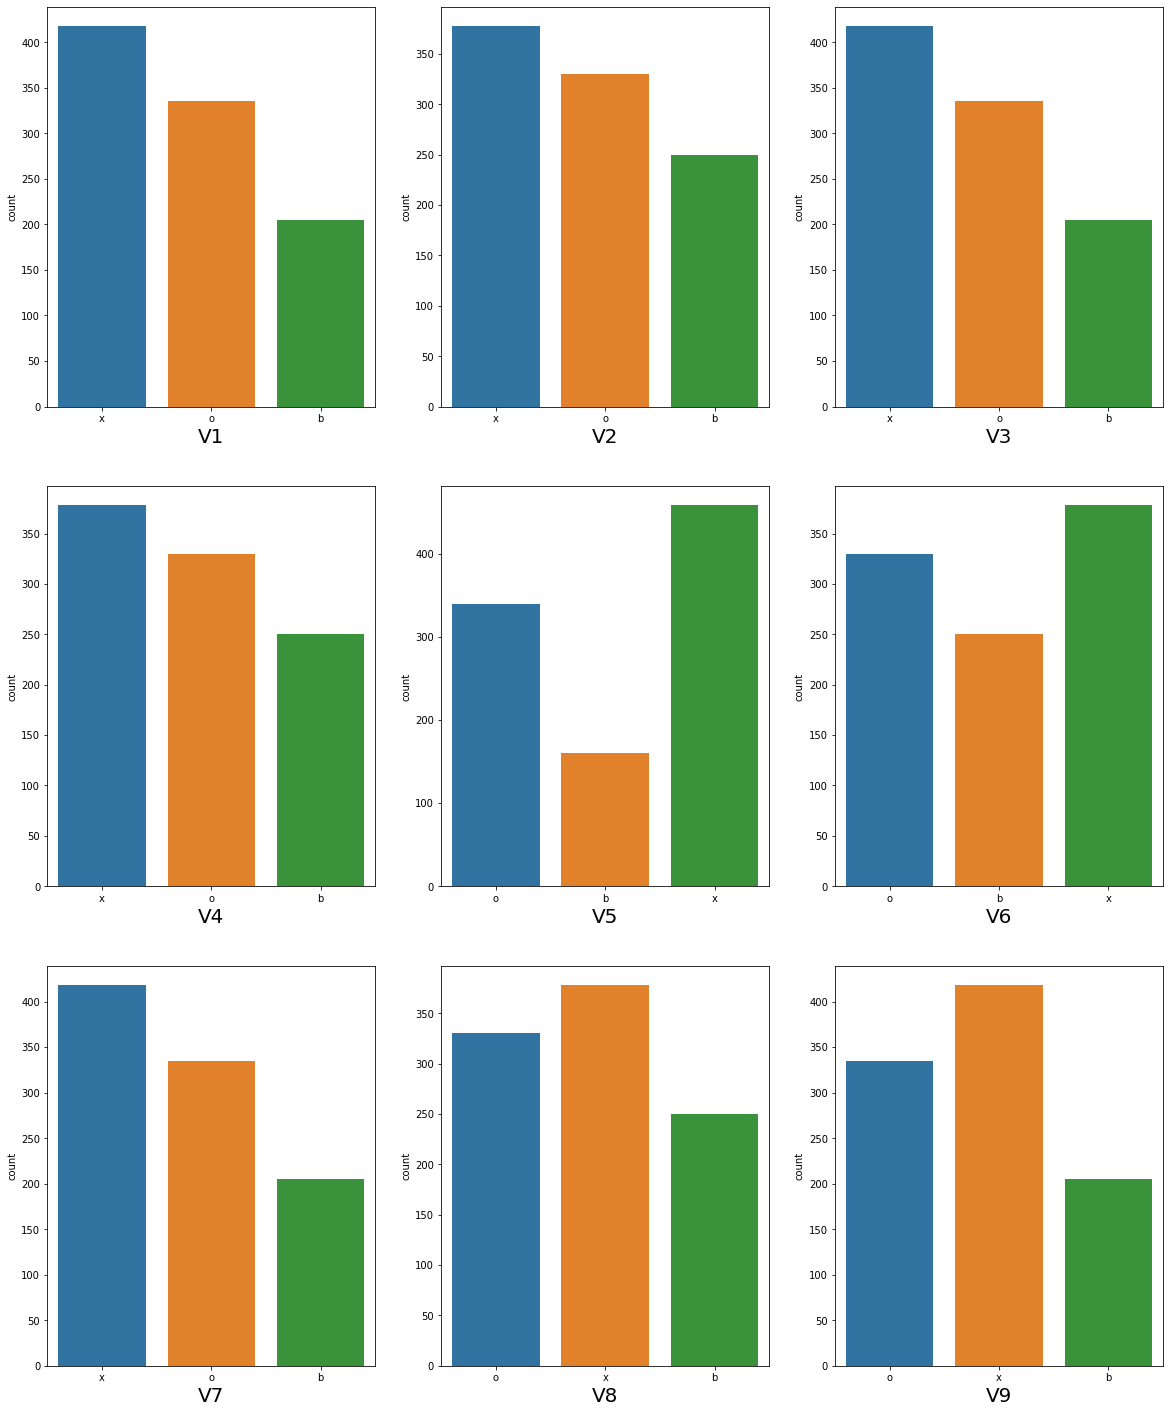

In [9]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :   
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

**Now making data a categorical into numerical features **

In [10]:
df.V10=df.V10.map({'positive':1,'negative':0})

In [11]:
x=pd.get_dummies(df.drop('V10',axis=1),drop_first=True)

In [12]:
df1=pd.concat([df,x],axis=1)
df1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V5_o,V5_x,V6_o,V6_x,V7_o,V7_x,V8_o,V8_x,V9_o,V9_x
0,x,x,x,x,o,o,x,o,o,1,...,1,0,1,0,0,1,1,0,1,0
1,x,x,x,x,o,o,o,x,o,1,...,1,0,1,0,1,0,0,1,1,0
2,x,x,x,x,o,o,o,o,x,1,...,1,0,1,0,1,0,1,0,0,1
3,x,x,x,x,o,o,o,b,b,1,...,1,0,1,0,1,0,0,0,0,0
4,x,x,x,x,o,o,b,o,b,1,...,1,0,1,0,0,0,1,0,0,0


**Dropping a columns**

In [13]:
delete=['V1',	'V2',	'V3',	'V4','V5','V6','V7','V8','V9']
df1.drop(delete,axis=1,inplace=True)

In [14]:
df1.dtypes

V10     int64
V1_o    uint8
V1_x    uint8
V2_o    uint8
V2_x    uint8
V3_o    uint8
V3_x    uint8
V4_o    uint8
V4_x    uint8
V5_o    uint8
V5_x    uint8
V6_o    uint8
V6_x    uint8
V7_o    uint8
V7_x    uint8
V8_o    uint8
V8_x    uint8
V9_o    uint8
V9_x    uint8
dtype: object

**Now a model is ready for a training x denotes a dependent feature anf y denotes independent features.** 

In [15]:
x=df1.drop('V10',axis=1)
y=df1.V10
### Data Preprocessing
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [17]:
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

**Logistic Regression**

In [67]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1])

In [68]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred)
confusion

array([[ 89,  11],
       [  0, 188]])

In [69]:
accuracy=confusion[0][0]/(confusion[0][1]+confusion[1][0]+confusion[1][1]+confusion[0][0])
accuracy

0.3090277777777778

<Figure size 432x288 with 0 Axes>

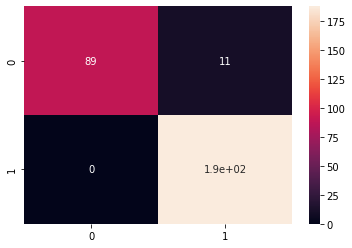

<Figure size 432x288 with 0 Axes>

In [53]:
sns.heatmap(confusion,annot=True)
plt.figure()


**So,from the above output ,we can see that there is 277 correct output and 11 incorrect output.**

In [25]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       100
           1       0.94      1.00      0.97       188

    accuracy                           0.96       288
   macro avg       0.97      0.95      0.96       288
weighted avg       0.96      0.96      0.96       288



**Decision Tree**

In [70]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
classify=DecisionTreeClassifier(criterion='entropy',random_state=0)
classify.fit(x_train,y_train)
y_pred=classify.predict(x_test)

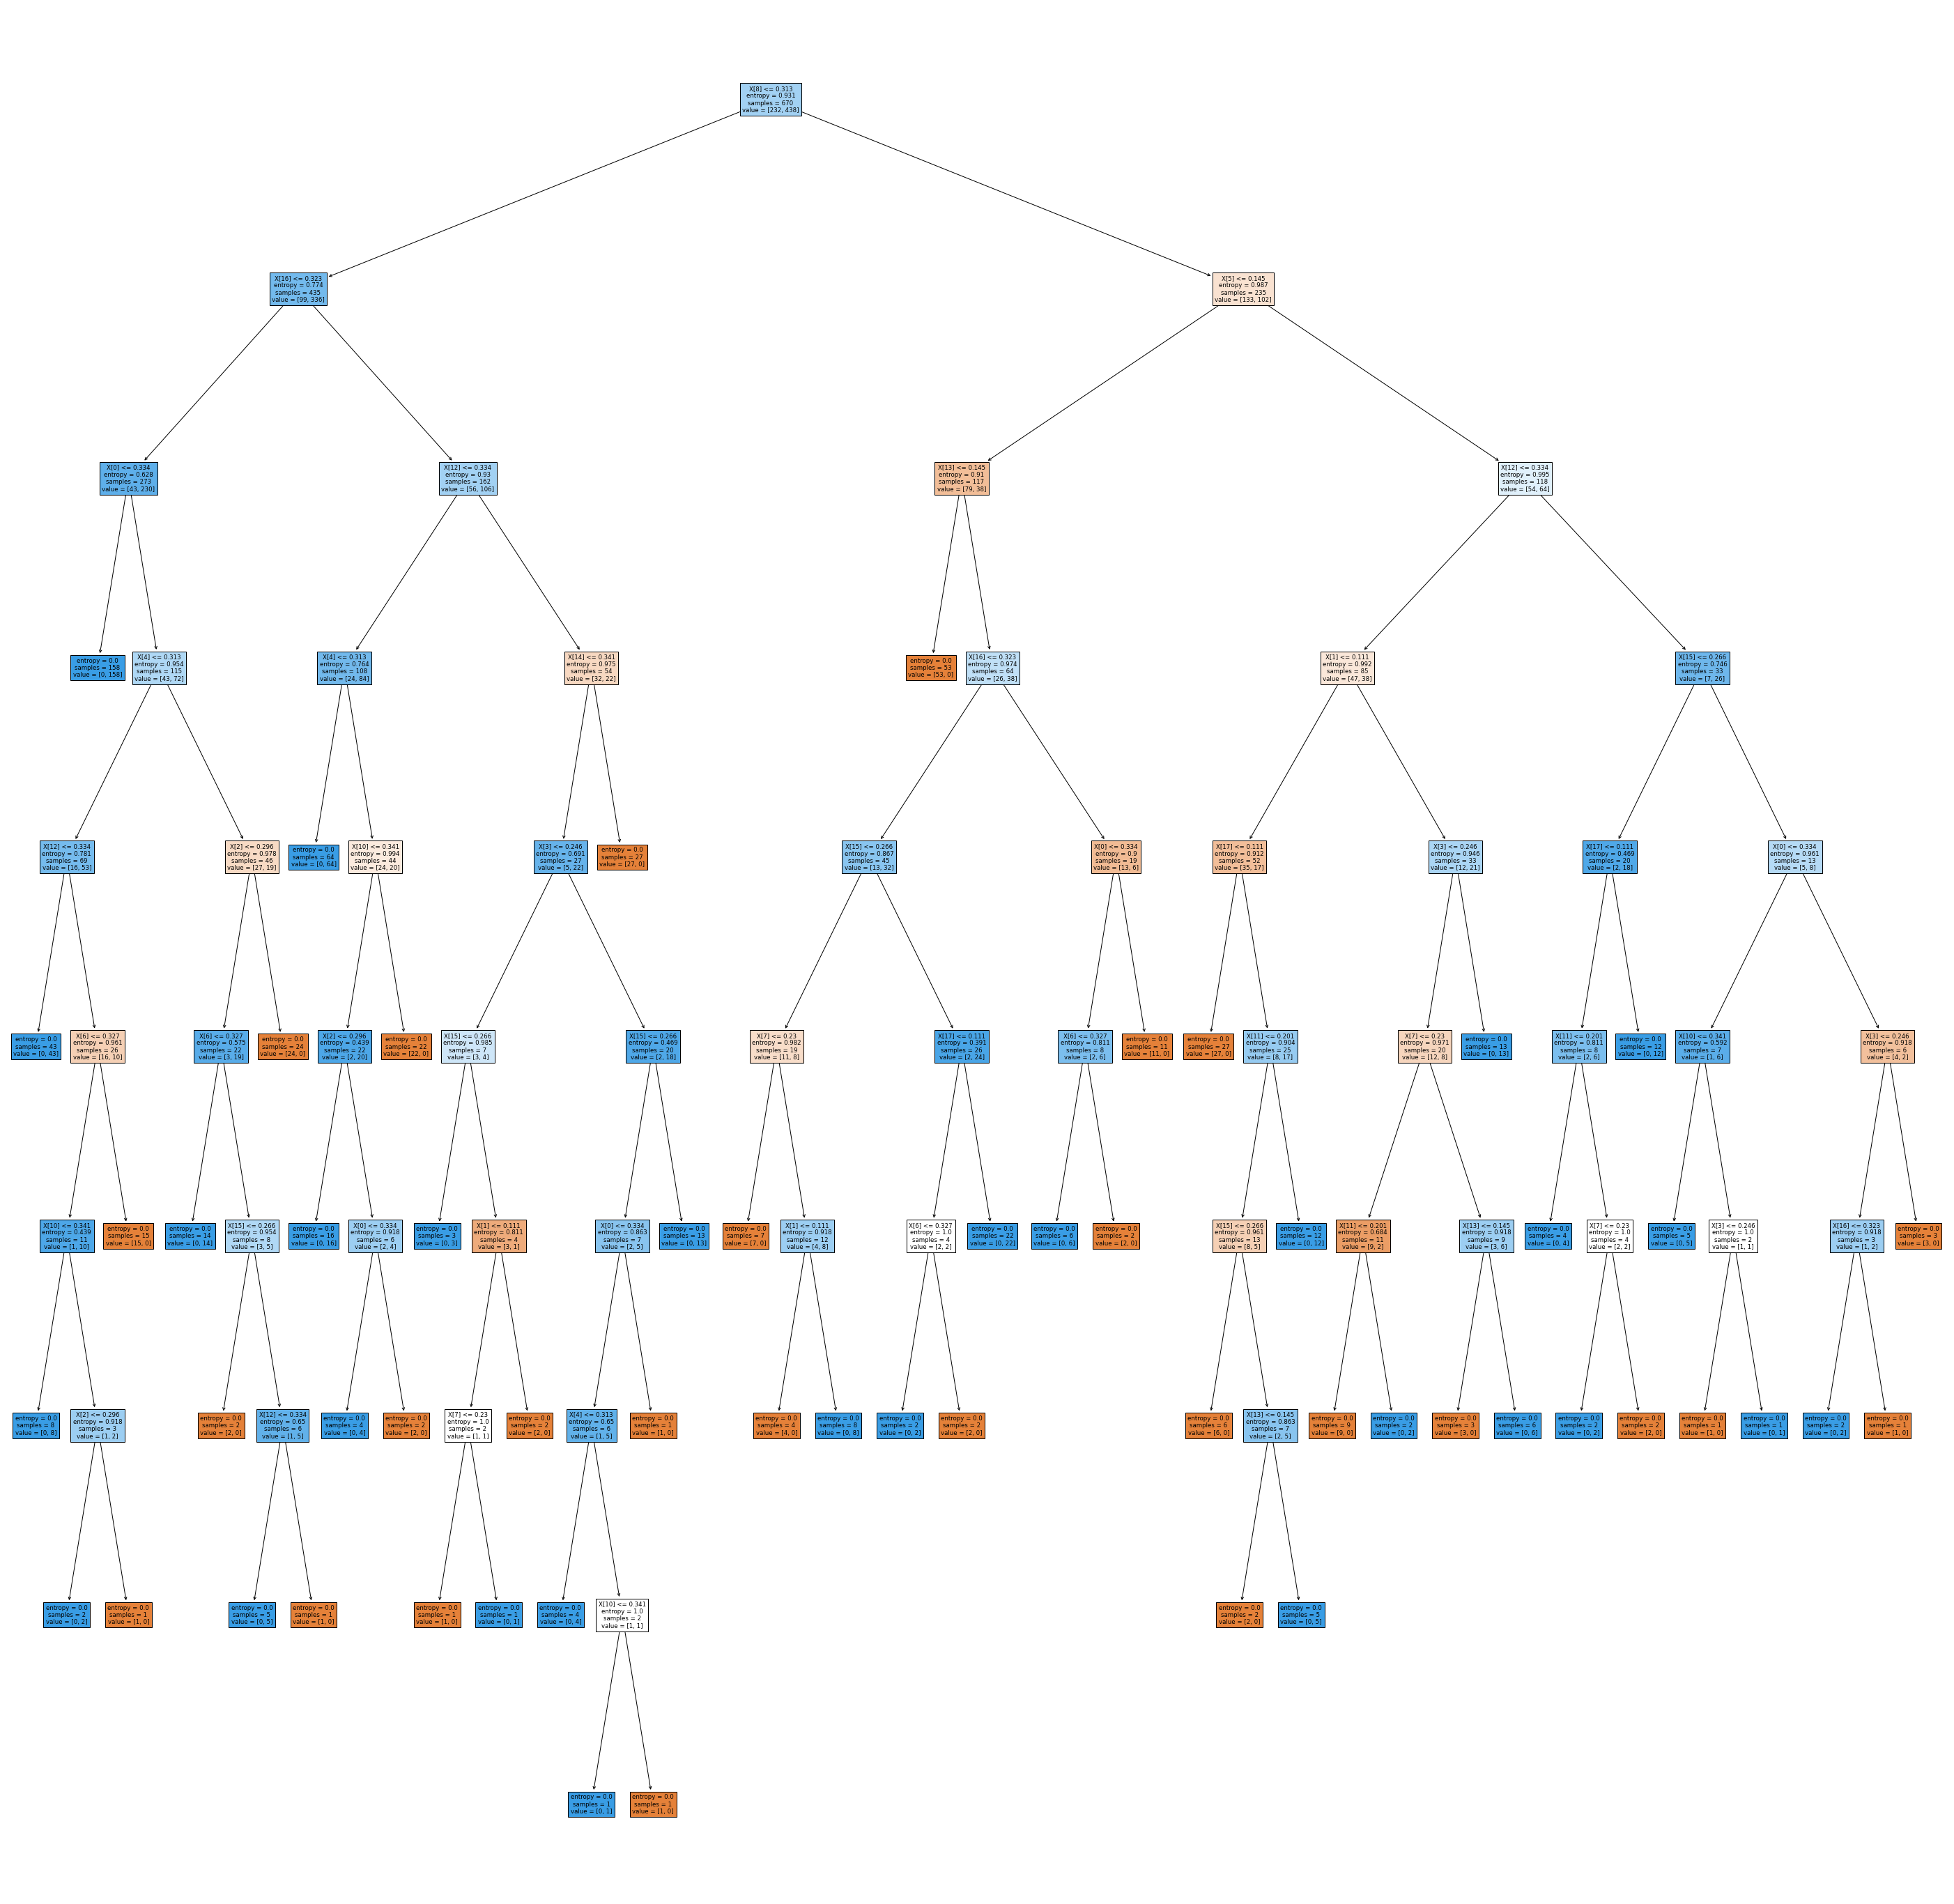

In [71]:
from sklearn import  tree
plt.figure(figsize=(50,50))
tree.plot_tree(classify,filled=True)
plt.show()

In [75]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred)
confusion

array([[ 84,  16],
       [  2, 186]])

In [76]:
metrics.accuracy_score(y_test,y_pred)

0.9375

<Figure size 432x288 with 0 Axes>

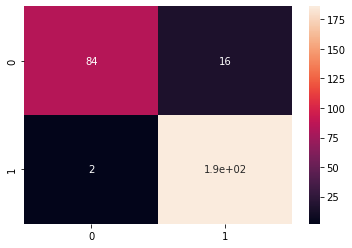

<Figure size 432x288 with 0 Axes>

In [74]:
sns.heatmap(confusion,annot=True)
plt.figure()

**So,from the above output ,we can see that there is 270 correct output and 18 incorrect output.**

In [31]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       100
           1       0.92      0.99      0.95       188

    accuracy                           0.94       288
   macro avg       0.95      0.91      0.93       288
weighted avg       0.94      0.94      0.94       288



**K Nearest Neighbors**

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_prediction=knn.predict(x_test)


In [33]:
knn.score(x_train,y_train)

0.9985074626865672

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion=confusion_matrix(y_test,y_prediction)
confusion

array([[ 99,   1],
       [  0, 188]])

In [55]:
accuracy=confusion[0][0]/(confusion[0][1]+confusion[1][0]+confusion[1][1]+confusion[0][0])
accuracy

0.34375

<Figure size 432x288 with 0 Axes>

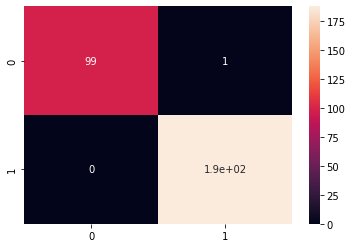

<Figure size 432x288 with 0 Axes>

In [37]:
sns.heatmap(confusion,annot=True)
plt.figure()

**So,from the above output ,we can see that there is 287 correct output and 1 incorrect output.**

In [35]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       0.99      1.00      1.00       188

    accuracy                           1.00       288
   macro avg       1.00      0.99      1.00       288
weighted avg       1.00      1.00      1.00       288



**CONCLUSION**

K nearest neighbors does not perform well.It leads to overfitting.It has low bias and high variance.Decision tree is more suitable as compared to logistic regression while seeing a classification.